In [2]:
!pip install tqdm 

In [3]:
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [4]:
import  pandas as pd
import numpy as np
import string
import nltk
import seaborn as sns 
import re
import matplotlib.pyplot as plt
import contractions
from textblob import TextBlob
from nltk import *
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
stop_word=set(stopwords.words("english"))
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
df=pd.read_csv("ReviewData.csv")
df


,Unnamed: 0,reviews
0,0,"If to say in a nutshell, product is MORE THAN EXCELLENT.My experience say that many global brands maintains focus on their product but the box/packaging in which it is being rolled out from the ma..."
1,1,"Ordered this product on 8th of July and I received it on 9th. Here are the pros and cons-Pros:1. Screen clarity is awesome.2. Superb call quality, Camera and Video Camera.3. Good Battery backup (F..."
2,2,"Pros : touch is great, phone response time is superb due to underlying OS.IPhone is much secure as compared to other phones as it will not allow unwanted malware or application getting installed a..."
3,3,Can be A very good gifts to older peoples.... because They don't need much memory space..... Phone is very fast... Thanks to apple's high optimized OS..... look and feel is very rich..... Camera a...
4,4,"Buy, if your Budget is below 13K.I am using the IPhone 4s for more than 10 months now, & i feel that if you are on tight budget & want to experience the IOS, then go for IPhone4s. (Note: If you co..."
...,...,...
13666,11453,The camera has good quality! I love that the betery last so long and I love that it runs fast and it look so cute !
13667,11454,I love this phone!!! The only thing I hate about apple is all the good apps you have to buy...
13668,11455,"I used to have this phone until i gave it to a company to fix the home button cause it got stuck a lot and they ended up breaking the motherboard and it was not backed up to icloud. so, iphone dow..."
13669,11456,I love this phone I loved the style of it never have had any problems in fact I'm using it right now. :)


In [6]:
df=df.iloc[:,1:]
df

,reviews
0,"If to say in a nutshell, product is MORE THAN EXCELLENT.My experience say that many global brands maintains focus on their product but the box/packaging in which it is being rolled out from the ma..."
1,"Ordered this product on 8th of July and I received it on 9th. Here are the pros and cons-Pros:1. Screen clarity is awesome.2. Superb call quality, Camera and Video Camera.3. Good Battery backup (F..."
2,"Pros : touch is great, phone response time is superb due to underlying OS.IPhone is much secure as compared to other phones as it will not allow unwanted malware or application getting installed a..."
3,Can be A very good gifts to older peoples.... because They don't need much memory space..... Phone is very fast... Thanks to apple's high optimized OS..... look and feel is very rich..... Camera a...
4,"Buy, if your Budget is below 13K.I am using the IPhone 4s for more than 10 months now, & i feel that if you are on tight budget & want to experience the IOS, then go for IPhone4s. (Note: If you co..."
...,...
13666,The camera has good quality! I love that the betery last so long and I love that it runs fast and it look so cute !
13667,I love this phone!!! The only thing I hate about apple is all the good apps you have to buy...
13668,"I used to have this phone until i gave it to a company to fix the home button cause it got stuck a lot and they ended up breaking the motherboard and it was not backed up to icloud. so, iphone dow..."
13669,I love this phone I loved the style of it never have had any problems in fact I'm using it right now. :)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13671 entries, 0 to 13670
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  13670 non-null  object
dtypes: object(1)
memory usage: 106.9+ KB


In [8]:
df.shape

(13671, 1)

In [9]:
df.describe()

,reviews
count,13670
unique,12934
top,Good
freq,52


In [10]:
df.isnull().sum()

reviews    1
dtype: int64

In [11]:
df[df["reviews"].isnull()]

,reviews
767,NaN


In [12]:
df.dropna(inplace=True,axis=0)


C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\3850668432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True,axis=0)


In [13]:
df.isnull().sum()

reviews    0
dtype: int64

In [14]:
df.shape

(13670, 1)

In [15]:
dff=df

# 1 . Data Preprosseng

1. Expanding Contraction 
2. Ake the all lower case
3. Remove the punctuation
4. Remove the numerical value
5. Remove commonnon -sensical text (/n)
6. tokenize text
7. Remove the stopword


In [16]:
!pip install text_hammer


## 1.1 Using Text Hammer 

In [17]:
pd.set_option('mode.chained_assignment','raise')

In [18]:
pd.set_option('mode.chained_assignment','warn')

In [19]:
import text_hammer as th


In [20]:

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name 
    
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: re.sub('\w*\d\w*','', x)) # remove numbers
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
  
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    df[column] = df[column].progress_apply(lambda x: re.sub("(.)\\1{2,}", "\\1", x))
    return(df)                                       
                                         

In [21]:

cleaned_df = text_preprocessing(df, "reviews")
cleaned_df

  0%|          | 0/13670 [00:00<?, ?it/s]

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\1384887383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].progress_apply(lambda x:str(x).lower())


  0%|          | 0/13670 [00:00<?, ?it/s]

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\1384887383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am


  0%|          | 0/13670 [00:00<?, ?it/s]

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\1384887383.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))


  0%|          | 0/13670 [00:00<?, ?it/s]

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\1384887383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))


  0%|          | 0/13670 [00:00<?, ?it/s]

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\1384887383.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].progress_apply(lambda x: re.sub('\w*\d\w*','', x)) # remove numbers


  0%|          | 0/13670 [00:00<?, ?it/s]

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\1384887383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))


  0%|          | 0/13670 [00:00<?, ?it/s]

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\1384887383.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))


  0%|          | 0/13670 [00:00<?, ?it/s]

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\1384887383.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))


  0%|          | 0/13670 [00:00<?, ?it/s]

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\1384887383.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,


  0%|          | 0/13670 [00:00<?, ?it/s]

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\1384887383.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].progress_apply(lambda x: re.sub("(.)\\1{2,}", "\\1", x))


,reviews
0,nutshell product excellentmy experience global brand maintain focus product boxpackaging roll manufacturing unit similar gauge quality standard philosophy making but experience regard apple iphone...
1,order product july receive pro conspro screen clarity awesome superb quality camera video camera good battery backup full charge come till nightcon phone start heating minute browse chat internet ...
2,pro touch great phone response time superb underlie osiphone secure compare phone allow unwanted malware application getting instal away databattery backup goodcon issue face iphone call say phone...
3,good gift old people need memory space phone fast thank apple high optimize os look feel rich camera video recording superb vlc player application play kind video simply love it
4,buy budget I iphone month now feel tight budget want experience ios note spend little iphone pro great ios superb display easily hand fit great camera hardware quality notch apple sale servicecon ...
...,...
13666,camera good quality love betery long love run fast look cute
13667,love phone thing hate apple good application buy
13668,phone give company fix home button cause get stuck lot end break motherboard back icloud so iphone down cry that great starter phone kid deserve it
13669,love phone love style problem fact right now


In [22]:
df=cleaned_df.drop_duplicates("reviews")
print(df.shape)


(12372, 1)


In [23]:
from nltk.stem import PorterStemmer
st=PorterStemmer()
df["reviews"]=df["reviews"].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
df


C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\687164344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviews"]=df["reviews"].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))


,reviews
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...
...,...
13666,camera good qualiti love beteri long love run fast look cute
13667,love phone thing hate appl good applic buy
13668,phone give compani fix home button caus get stuck lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it
13669,love phone love style problem fact right now


# 2. EDA

### we here are adding length of review and word count of each reviews

#### polarity show the sentiment of place of text
#### it count positive and negative word & determine  polarity 
#### value range of polarity is -1 to 1 , 0 represent neutral , -1 represent negative 1 represent positive

In [24]:
df['review_len'] = df['reviews'].astype(str).apply(len)
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split())) 

C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\2912475085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_len'] = df['reviews'].astype(str).apply(len)
C:\Users\jejur\AppData\Local\Temp\ipykernel_16344\2912475085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split()))


In [25]:
df

,reviews,review_len,word_count
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96
...,...,...,...
13666,camera good qualiti love beteri long love run fast look cute,60,11
13667,love phone thing hate appl good applic buy,42,8
13668,phone give compani fix home button caus get stuck lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it,144,26
13669,love phone love style problem fact right now,44,8


In [26]:
pd.options.mode.chained_assignment=None

In [27]:
df["polarity"]=df['reviews'].map(lambda text : TextBlob(text).sentiment.polarity)

In [28]:
df

,reviews,review_len,word_count,polarity
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179,0.172645
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45,0.637500
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63,0.430000
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30,0.454375
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96,0.191071
...,...,...,...,...
13666,camera good qualiti love beteri long love run fast look cute,60,11,0.391667
13667,love phone thing hate appl good applic buy,42,8,0.133333
13668,phone give compani fix home button caus get stuck lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it,144,26,0.214815
13669,love phone love style problem fact right now,44,8,0.428571


In [29]:
def sentiment(label):
    if label <0:
        return"negative"
    elif label >= 0:
        return "positive"

In [30]:
df["sentiment"]=df["polarity"].apply(sentiment)

In [31]:
df

,reviews,review_len,word_count,polarity,sentiment
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179,0.172645,positive
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45,0.637500,positive
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63,0.430000,positive
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30,0.454375,positive
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96,0.191071,positive
...,...,...,...,...,...
13666,camera good qualiti love beteri long love run fast look cute,60,11,0.391667,positive
13667,love phone thing hate appl good applic buy,42,8,0.133333,positive
13668,phone give compani fix home button caus get stuck lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it,144,26,0.214815,positive
13669,love phone love style problem fact right now,44,8,0.428571,positive


In [32]:
df["sentiment"].value_counts()

positive    10942
negative     1430
Name: sentiment, dtype: int64

## 2.1 Distribution ( Visualization)

#### distributioin of word cloud ,review len & polaity

array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

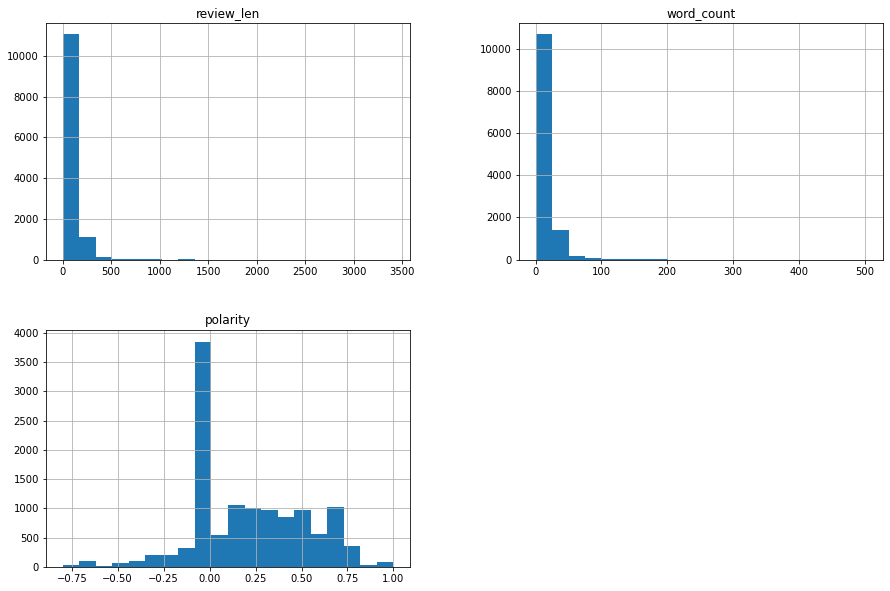

In [33]:
df[["review_len","word_count","polarity"]].hist(bins=20, figsize=(15,10))


1. The Distribution of review & word count are similar
2. Majority of population line is all loer range
3. Heavely right distribution here
4. Polarity always normal
5. Majority polarity more thaan zero 
6. That means maximum review has been positive reviews


### Polarity  Vs Reviews

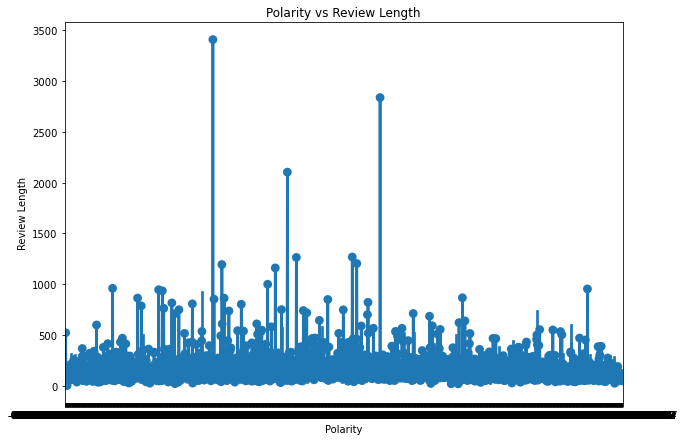

In [34]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,7))
sns.pointplot(x="polarity",y="review_len",data=df)
plt.xlabel("Polarity")
plt.ylabel("Review Length")
plt.title("Polarity vs Review Length")
plt.show()


<AxesSubplot:xlabel='sentiment', ylabel='count'>

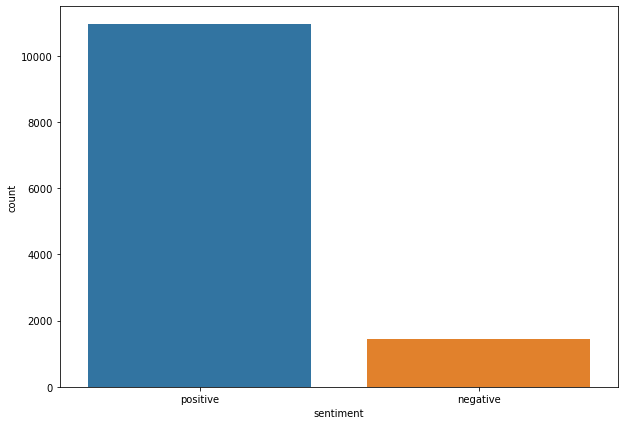

In [35]:
fig=plt.figure(figsize=(10,7))
sns.countplot(x="sentiment",data=df)

Text(0.5, 1.0, 'Distribution of sentiments')

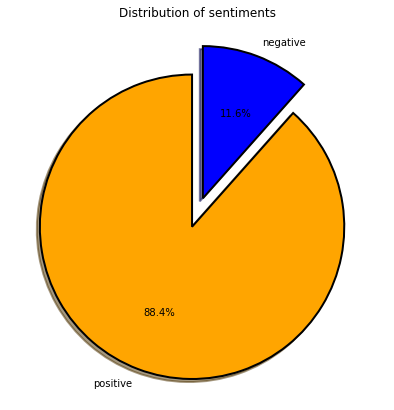

In [36]:
fig = plt.figure(figsize=(10,7))
colors = ("orange", "blue")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

## 2.2 Wordcloud

 #### Positive Reviews


In [37]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [38]:
pos_rev = df[df.sentiment == 'positive']
pos_rev = pos_rev.sort_values(['polarity'], ascending= False)
pos_rev.head()

,reviews,review_len,word_count,polarity,sentiment
9981,phone use perfect featur handi amaz work phone,46,8,1.0,positive
7993,perfect deliveri,16,2,1.0,positive
8193,product perfect deliveri awesom,31,4,1.0,positive
8859,perfect phone littl bit heavi weight awesom batteri backup perform thank snapdeal,81,12,1.0,positive
10454,purchas year perfect work condit unheard,40,6,1.0,positive


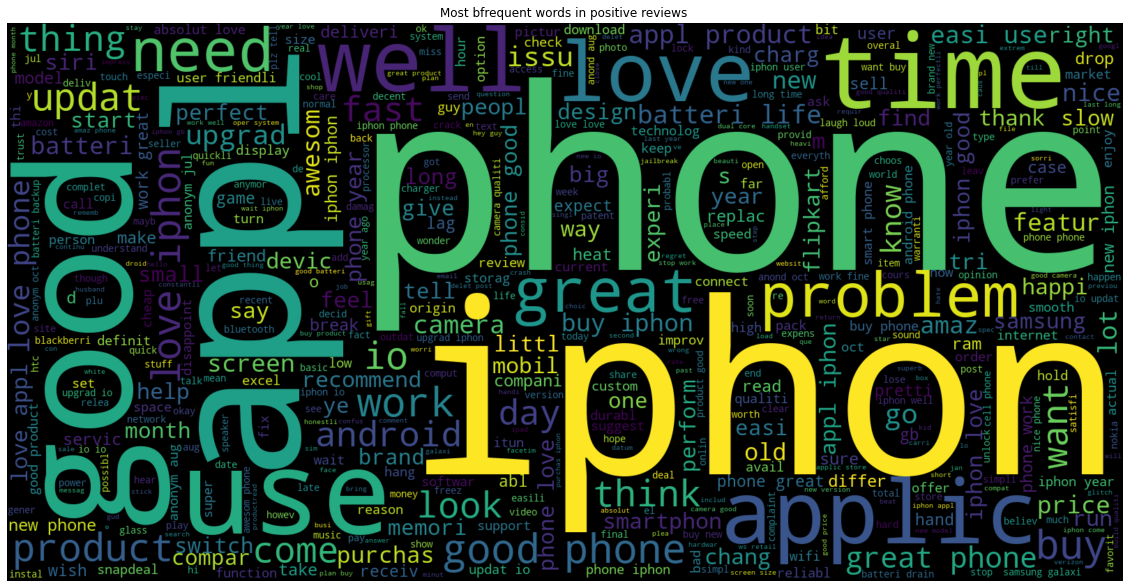

In [39]:
text=" ".join([word for word  in pos_rev["reviews"]])
plt.figure(figsize=(20,15),facecolor=None)
wordcloud=WordCloud(max_words =500,width = 1600,height=800).generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Most bfrequent words in positive reviews ")
plt.show()

###  Negative Reviews 






In [40]:
neg_rev=df[df.sentiment=="negative"]
neg_rev=neg_rev.sort_values(["polarity"] , ascending =False)
neg_rev.head()

,reviews,review_len,word_count,polarity,sentiment
5306,ali aug iphon that s awesom awesom iphon without youtub client googl map which backbon appl success past now googl long go support appi compani smartphonetablet laptop futur contract period expir,195,31,-4.625929e-18,negative
6079,anond oct appl reason applic appstor well qualiti accord youi beca want free useless applic say i m iphon until din purchas singl applic everth it say free adroid lover know degrad applic store an...,407,72,-6.167906e-18,negative
4143,updat wifi batteri thing ok apart camera work anytim launch home screen show blank screen work perfectli launch game center viber whatsapp have problem solv it advis,165,27,-6.938894e-18,negative
9067,last long iphon famili while absolut it get slow crack nice use upgrad make look small unbear,93,17,-1.110223e-17,negative
12205,love iphon old version slow complaint phone power button break randomli,71,11,-1.387779e-17,negative


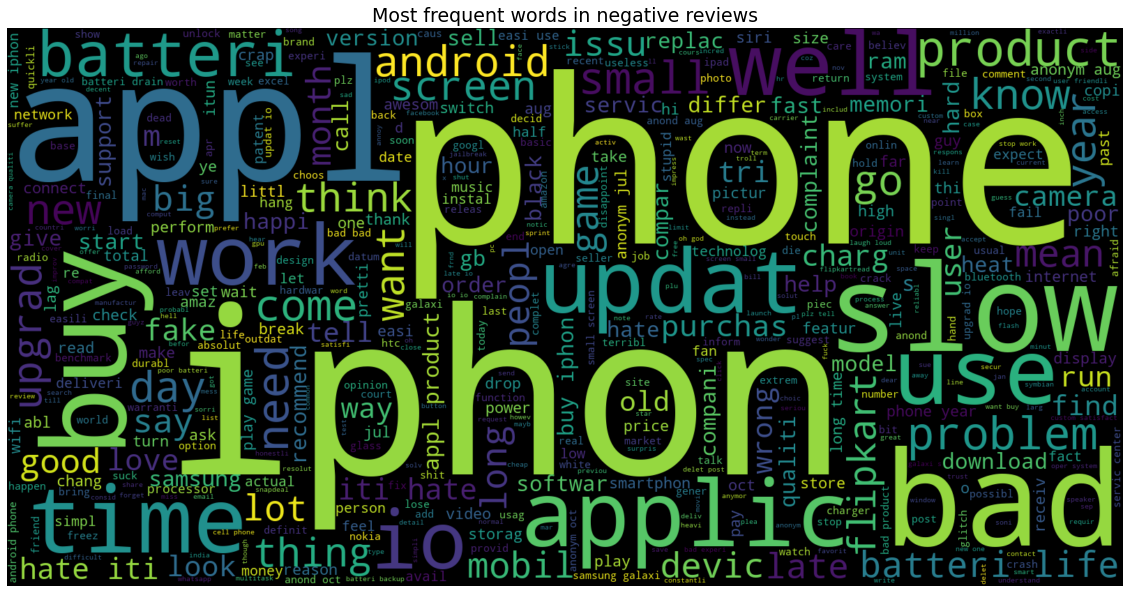

In [41]:
text = ' '.join([word for word in neg_rev['reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

# 3. Feature Generation 
### frequency charts (BoW)

In [42]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['reviews'], 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.head()

,Review,count
0,phone,7884
1,iphon,7121
2,appl,3184
3,good,3153
4,love,2695


<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

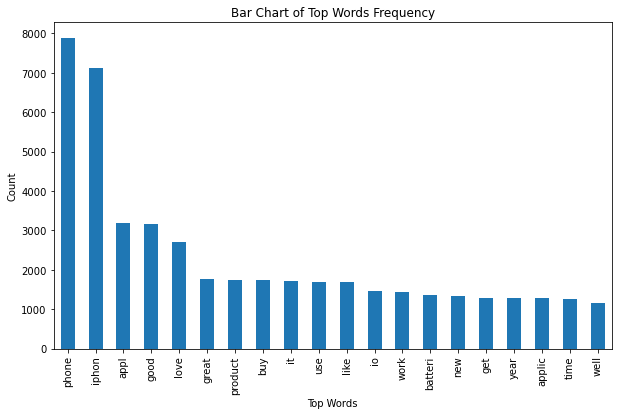

In [43]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

#### following plot show topmost frequent bigrame

In [44]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['reviews'], 30)
df2 = pd.DataFrame(common_words2, columns=['Review', "Count"])
df2.head()

,Review,Count
0,good phone,558
1,love iphon,528
2,batteri life,426
3,appl product,418
4,do not,409


<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

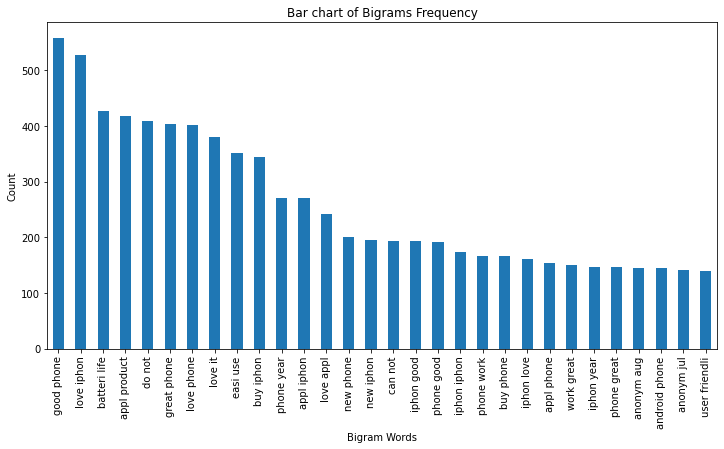

In [45]:
df2.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

#### Following plot show the topmost frequent trigrams

In [46]:

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['reviews'], 30)
df3 = pd.DataFrame(common_words3, columns = ['Review' , 'Count'])
df3.head()

,Review,Count
0,love appl product,110
1,iphon good phone,62
2,hate iti hate,57
3,iti hate iti,56
4,batteri drain fast,43


<AxesSubplot:title={'center':'Bar chart of Trigrams Frequency'}, xlabel='Trigram Words', ylabel='Count'>

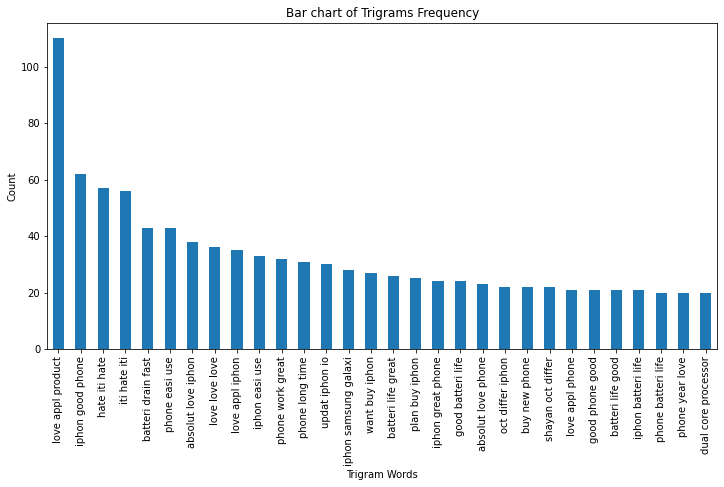

In [47]:
df3.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

## 3.2 Part of Speech taging

<AxesSubplot:title={'center':'Bar Chart of the Frequency of the Parts of Speech'}, xlabel='Part Of Speech', ylabel='Frequency'>

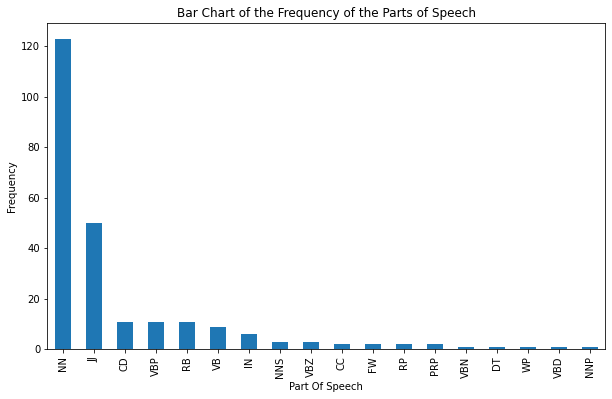

In [48]:
blob = TextBlob(str(df['reviews']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech",
           figsize=(10, 6))

In [49]:
pos_df

NN     123
JJ      50
CD      11
VBP     11
RB      11
VB       9
IN       6
NNS      3
VBZ      3
CC       2
FW       2
RP       2
PRP      2
VBN      1
DT       1
WP       1
VBD      1
NNP      1
Name: pos, dtype: int64

In [50]:

df

,reviews,review_len,word_count,polarity,sentiment
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179,0.172645,positive
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45,0.637500,positive
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63,0.430000,positive
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30,0.454375,positive
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96,0.191071,positive
...,...,...,...,...,...
13666,camera good qualiti love beteri long love run fast look cute,60,11,0.391667,positive
13667,love phone thing hate appl good applic buy,42,8,0.133333,positive
13668,phone give compani fix home button caus get stuck lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it,144,26,0.214815,positive
13669,love phone love style problem fact right now,44,8,0.428571,positive


In [51]:

df.to_csv("cleaned_data1.csv")

## 4 Model Building

In [52]:
df=pd.read_csv("cleaned_data1.csv")
df

,Unnamed: 0,reviews,review_len,word_count,polarity,sentiment
0,0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179,0.172645,positive
1,1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45,0.637500,positive
2,2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63,0.430000,positive
3,3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30,0.454375,positive
4,4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96,0.191071,positive
...,...,...,...,...,...,...
12367,13666,camera good qualiti love beteri long love run fast look cute,60,11,0.391667,positive
12368,13667,love phone thing hate appl good applic buy,42,8,0.133333,positive
12369,13668,phone give compani fix home button caus get stuck lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it,144,26,0.214815,positive
12370,13669,love phone love style problem fact right now,44,8,0.428571,positive


In [53]:
df=df.iloc[:,1:]
df

,reviews,review_len,word_count,polarity,sentiment
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179,0.172645,positive
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45,0.637500,positive
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63,0.430000,positive
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30,0.454375,positive
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96,0.191071,positive
...,...,...,...,...,...
12367,camera good qualiti love beteri long love run fast look cute,60,11,0.391667,positive
12368,love phone thing hate appl good applic buy,42,8,0.133333,positive
12369,phone give compani fix home button caus get stuck lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it,144,26,0.214815,positive
12370,love phone love style problem fact right now,44,8,0.428571,positive


In [54]:
df["sentiment"]=df["sentiment"].map({"positive":1,"negative":0})

In [55]:
df

,reviews,review_len,word_count,polarity,sentiment
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179,0.172645,1
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45,0.637500,1
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63,0.430000,1
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30,0.454375,1
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96,0.191071,1
...,...,...,...,...,...
12367,camera good qualiti love beteri long love run fast look cute,60,11,0.391667,1
12368,love phone thing hate appl good applic buy,42,8,0.133333,1
12369,phone give compani fix home button caus get stuck lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it,144,26,0.214815,1
12370,love phone love style problem fact right now,44,8,0.428571,1


In [56]:
x=df["reviews"].values.astype(str)
y=df["sentiment"]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x.dtype

dtype('<U3409')

In [59]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [60]:
y_train.shape,y_test.shape

((9897,), (2475,))

In [61]:
print("No of reviews in total set  :",  format(len(x)))
print("No of reviews in training set :", format(len(x_train)))
print("No of reviews in testing set :", format(len(x_test)))

No of reviews in total set  : 12372
No of reviews in training set : 9897
No of reviews in testing set : 2475


## 4.1 Using CountVectorizer

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cvx_train = cv.fit_transform(x_train).toarray()
cvx_test = cv.transform(x_test).toarray()

In [64]:
cvx_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score

In [66]:
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

## A . Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(cvx_train,y_train)
print(" lr accuracy : ",lr.score(cvx_test,y_test))
y_test_pred_lr = lr.predict(cvx_test)
print_score(y_test,y_test_pred_lr,train=False)
print("lr train accuracy : ",lr.score(cvx_train,y_train))

 lr accuracy :  0.9414141414141414
Test Result:
Accuracy Score: 94.14%
_______________________________________________
Classification Report:
                    0            1  accuracy    macro avg  weighted avg
precision    0.821918     0.953014  0.941414     0.887466      0.937865
recall       0.629371     0.982184  0.941414     0.805777      0.941414
f1-score     0.712871     0.967379  0.941414     0.840125      0.937969
support    286.000000  2189.000000  0.941414  2475.000000   2475.000000
_______________________________________________
Confusion Matrix: 
 [[ 180  106]
 [  39 2150]]

lr train accuracy :  0.9873699100737597


In [68]:
y_train_pred_lr= lr.predict(cvx_train)
y_train_pred_lr

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

 ## B) XGBoost Classifier 

In [69]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
# xgb_clf.fit(tfX_train, y_train, eval_metric='aucpr')
xgb_clf.fit(cvx_train, y_train, eval_metric='logloss')

y_test_pred_xgb = xgb_clf.predict(cvx_test)
print_score(y_test, y_test_pred_xgb, train=False)
print("xgb_clf train accuracy: ",xgb_clf.score(cvx_train,y_train))

C:\Users\jejur\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Test Result:
Accuracy Score: 94.91%
_______________________________________________
Classification Report:
                    0            1  accuracy    macro avg  weighted avg
precision    0.807692     0.965688  0.949091     0.886690      0.947431
recall       0.734266     0.977159  0.949091     0.855712      0.949091
f1-score     0.769231     0.971390  0.949091     0.870310      0.948029
support    286.000000  2189.000000  0.949091  2475.000000   2475.000000
_______________________________________________
Confusion Matrix: 
 [[ 210   76]
 [  50 2139]]

xgb_clf train accuracy:  0.9801960189956552


In [71]:

print(" xbg test accuracy:",xgb_clf.score(cvx_test,y_test))


 xbg test accuracy: 0.9490909090909091


In [72]:
y_train_pred_xgb=xgb_clf.predict(y_train)
y_train_pred_xgb

array([1, 1, 1, ..., 1, 1, 1])

## 4.2 Using Tfidf Vectorizer

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()
tfx_train=vectorization.fit_transform(x_train)
tfx_test=vectorization.transform(x_test)


## A ] Logistic Regression Model 

In [99]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(tfx_train,y_train)
print("lr accuracy:",lr.score(tfx_test,y_test))
y_test_pred_tflr=lr.predict(tfx_test)
print_score(y_test,y_test_pred_tflr,train=False)
print("lr train accuracy:",lr.score(tfx_train,y_train))

lr accuracy: 0.9094949494949495
Test Result:
Accuracy Score: 90.95%
_______________________________________________
Classification Report:
                    0            1  accuracy    macro avg  weighted avg
precision    0.887500     0.910230  0.909495     0.898865      0.907603
recall       0.248252     0.995889  0.909495     0.622070      0.909495
f1-score     0.387978     0.951134  0.909495     0.669556      0.886059
support    286.000000  2189.000000  0.909495  2475.000000   2475.000000
_______________________________________________
Confusion Matrix: 
 [[  71  215]
 [   9 2180]]

lr train accuracy: 0.9231080125290492


In [100]:
y_train_pred_tflr= lr.predict(tfx_train)
y_train_pred_tflr


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

## XGBoost Classifier

In [101]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier()
xgb_clf.fit(tfx_train,y_train)
y_test_pred_tfxb=xgb_clf.predict(tfx_test)
print_score(y_test,y_test_pred_tfxb,train=False)
print("xgb clf train accuracy",xgb_clf.score(tfx_train,y_train))
print("xgb clf test accuracy",xgb_clf.score(tfx_test,y_test))

Test Result:
Accuracy Score: 94.75%
_______________________________________________
Classification Report:
                    0            1  accuracy    macro avg  weighted avg
precision    0.817073     0.961866  0.947475     0.889470      0.945135
recall       0.702797     0.979443  0.947475     0.841120      0.947475
f1-score     0.755639     0.970575  0.947475     0.863107      0.945738
support    286.000000  2189.000000  0.947475  2475.000000   2475.000000
_______________________________________________
Confusion Matrix: 
 [[ 201   85]
 [  45 2144]]

xgb clf train accuracy 0.9854501364049713
xgb clf test accuracy 0.9474747474747475


In [102]:
y_train_pred_tfxb=lr.predict(tfx_train)
y_train_pred_tfxb

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [110]:
data={  "Vectorizer":["Count Vectorizer","Count Vectorizer","Tfidf Vectorizer","Tfidf Vectorizer"],
        "Model":["Linear Regression","Linear Regression","XGBoost Classifier","XGBoost Classifier"],
        "Training":[
            (accuracy_score(y_train,y_train_pred_lr)*100),
            (accuracy_score(y_train,y_train_pred_xgb)*100),
            (accuracy_score(y_train,y_train_pred_tflr)*100),
            (accuracy_score(y_train,y_train_pred_tfxb)*100)],
       "Testing":[
            (accuracy_score(y_test,y_test_pred_lr)*100),
            (accuracy_score(y_test,y_test_pred_xgb)*100),
            (accuracy_score(y_test,y_test_pred_tflr)*100),
            (accuracy_score(y_test,y_test_pred_tfxb)*100)]
           }

In [111]:
df=pd.DataFrame(data)
df.set_index(["Vectorizer","Model"],inplace=True)

In [112]:
df

Training    Testing
Vectorizer       Model                                   
Count Vectorizer Linear Regression   98.736991  90.949495
                 Linear Regression   88.440942  94.909091
Tfidf Vectorizer XGBoost Classifier  92.310801  90.949495
                 XGBoost Classifier  92.310801  94.747475

# 5 ) Model  Deployment

In [113]:
from sklearn.pipeline import Pipeline

In [124]:
pipeline=Pipeline([("CountVectorizer",cv),("clf",xgb_clf)])

In [125]:
import pickle
import pickle
pickle.dump(pipeline,open('final_deployment.pkl','wb'))

In [126]:
prediction = pipeline.predict(["It is Bad"])

if prediction == 1:
    print("Result: This review is positive")
else:
    print("Result: This review is negative")

Result: This review is negative
